In [3]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

directory = 'drive/MyDrive/ISYE7750/hw1/'

Mounted at /content/drive


In [4]:
def b2(x):
  if -1.5 <= x < -0.5:
    return (x + 1.5)**2/2
  elif -0.5 <= x < 0.5:
    return -x**2 + 0.75
  elif 0.5 <= x <= 1.5:
    return (x - 1.5)**2/2
  else:
    return 0


def bspline(A, X):
  fx = []
  for x in X:
    tmp = 0
    for k, a in enumerate(A):
      tmp += a * b2(x - k)
    fx.append(tmp)
  return np.array(fx)

In [22]:
# (a)

pts = np.linspace(-5, 7.5, 200)
alpha = [2, 1, -1, 3, -1]
res = bspline(alpha, pts)

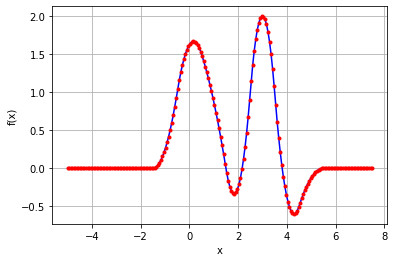

In [25]:
# Plotting
fig = plt.plot()
plt.plot(pts, res, ".-", c='blue', mfc='red', mec='red')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.savefig(directory + "bspline_01.png")

In [27]:
# (b)

fi = np.array([2, 2, -5, -5, -2])
pts = np.array([0,1,2,3,4])

B = np.zeros((5,5))
for i, x in enumerate(pts):
  for j in range(5):
    B[i, j] = b2(x - j)

alpha = np.linalg.inv(B) @ fi
print(alpha)

[ 2.1044733   3.37316017 -6.34343434 -5.31255411 -1.78124098]


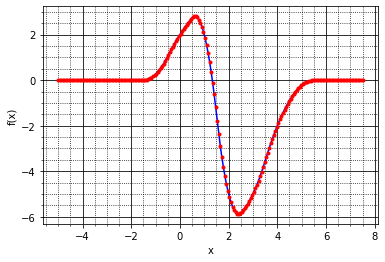

In [31]:
# Plot to check
pts = np.linspace(-5, 7.5, 200)
res = bspline(alpha, pts)

fig = plt.plot()
plt.plot(pts, res, ".-", c='blue', mfc='red', mec='red')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.minorticks_on()
plt.grid(b=True, which='major', color='k', linestyle='-')
plt.grid(b=True, which='minor', color='k', linestyle=':')
plt.savefig(directory + "bspline_02.png")